# **Projek Machine Learning (Clustering)**

Nama : Fadhlurrahman Akbar Nasution

NIM  : 1301194258

Kelas : IF-43-09

## **Impoart Libarry Yang Digunakan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import random

## **Memasukan dataset yang akan digunakan**

In [2]:
# df_train = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/Documents/Kuliah/SEMESTER_5/Machine_Learning/Tubes_ML_Clustering/Data/kendaraan_train.csv')
df_train = pd.read_csv('Data/kendaraan_train_clean.csv')
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.122799,-0.534762,0.044711,0.506524,1.092527,-1.069754,-1.024379,-0.763296,0.710121,-0.701261
1,0.890628,0.656147,0.044711,0.978349,-0.915305,2.491438,0.976197,-1.025075,-1.606579,0.045787
2,0.890628,-1.130216,0.044711,1.528812,1.092527,-1.069754,-1.024379,-0.210846,0.860800,-0.431833
3,0.890628,0.788470,0.044711,0.663799,-0.915305,2.491438,0.976197,0.038602,-0.495316,0.486668
4,0.890628,-1.130216,0.044711,0.663799,1.092527,-1.069754,-1.024379,-1.385036,0.710121,0.204994
...,...,...,...,...,...,...,...,...,...,...
230562,-1.122799,-0.997893,0.044711,-1.773964,1.092527,-1.069754,-1.024379,-1.002996,0.710121,0.768342
230563,-1.122799,-1.130216,0.044711,1.528812,1.092527,-1.069754,-1.024379,1.192945,0.710121,-1.276855
230564,-1.122799,-0.997893,0.044711,1.843362,1.092527,-1.069754,-1.024379,1.787791,0.710121,0.878562
230565,0.890628,1.979378,0.044711,-1.538051,1.092527,0.710842,-1.024379,-0.472743,0.182742,1.417417


In [3]:
df_train.dtypes

Jenis_Kelamin        float64
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan       float64
Kendaraan_Rusak      float64
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
dtype: object

In [4]:
#mengambil kolom data yang akan digunakan dan sudah di normalisasi
df_train =df_train[['Umur', 'Premi']]
df_train

,Umur,Premi
0,-0.534762,-0.763296
1,0.656147,-1.025075
2,-1.130216,-0.210846
3,0.788470,0.038602
4,-1.130216,-1.385036
...,...,...
230562,-0.997893,-1.002996
230563,-1.130216,1.192945
230564,-0.997893,1.787791
230565,1.979378,-0.472743


In [5]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df_train))

Total Data : 230567


## **Clustering**

In [6]:
#Metode Euclidean Untuk Menghitung jarak
def euclidean(x, centroid):
  return np.linalg.norm(x - centroid)

In [7]:
def kmeans(k, data,max_iterasion):
    #inisiasi centroid dengan memilihnya secara random
    centroid = {i: data[random.randint(0, len(data))] for i in range(k)}
    # untuk mendapatkan 
    inertia = 0
    # inisiasi variable sameCentroid dengan false
    sameCentroid = False
    i = 0
    while(sameCentroid!=True) and (i < max_iterasion):
        #Mencopy centroid sebelumnya
        temp = centroid.copy()
        #Mengisi dictonary cluster yang setiap keynya memiliki array kosong sebanyak k
        cluster = {}
        for j in range(k):
            cluster[j] = []
        # Array untuk menyimpan nilai perhitungan jarak
        T = []
        
        #mencari nilai centroid terdekat dengan menggunakan metode euclidean 
        #dan mencari nilai minimum pada setiap distancenya yang akan dimasukan kedalam cluster  
        for row in data:
            dist = [euclidean(row,centroid[x]) for x in centroid] 
            T.append(np.min(dist))#menyimpan nilai perhitungan jarak
            cluster[dist.index(min(dist))].append(row)

        #melakukan hasil tambah dari nilai perhitungan jarak yang telah diambil sebelumnya
        inertia = sum(T)

        #Update centroid menggunakan mean
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl],axis = 0)
        
        #Melakukan pengecekan apakah centroid telah mencapai nilai yang maksimal / konvergen
        for key in cluster.keys():
            if(temp.get(key)==centroid.get(key))[0]:
                sameCentroid = True
                break
        i+=1
    
    return centroid,cluster,inertia

## **FUNGSI MAIN** 

Centroid Cluster 2=
{0: array([-0.58340623, -0.42892468]), 1: array([0.91204369, 0.67054143])}



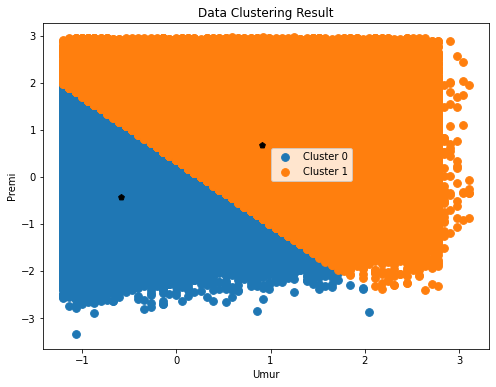

Centroid Cluster 3=
{0: array([-0.65384288, -0.55673929]), 1: array([0.01697962, 1.40127771]), 2: array([ 1.23303448, -0.11379955])}



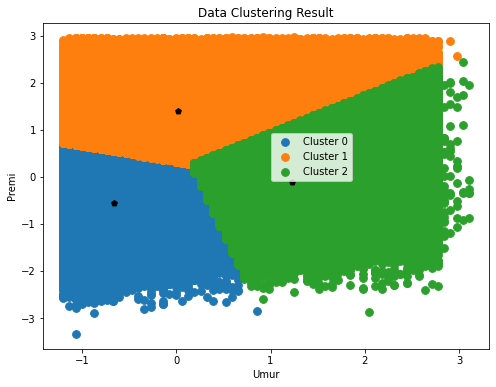

Centroid Cluster 4=
{0: array([ 1.03144643, -0.36895367]), 1: array([1.19996085, 1.45043822]), 2: array([-0.69886702, -0.69771812]), 3: array([-0.58382209,  0.92948317])}



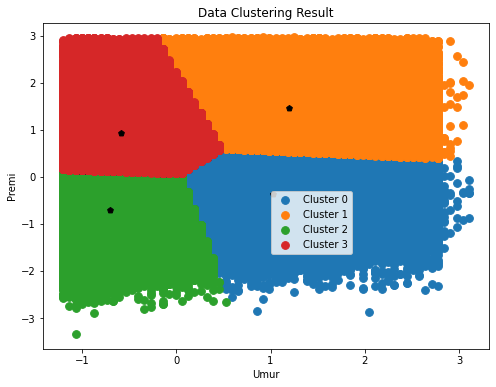

Centroid Cluster 5=
{0: array([-0.67090822, -0.02520814]), 1: array([ 1.02596585, -0.39267002]), 2: array([1.38528413, 1.29358585]), 3: array([-0.68130386, -1.07558086]), 4: array([-0.40878964,  1.47819727])}



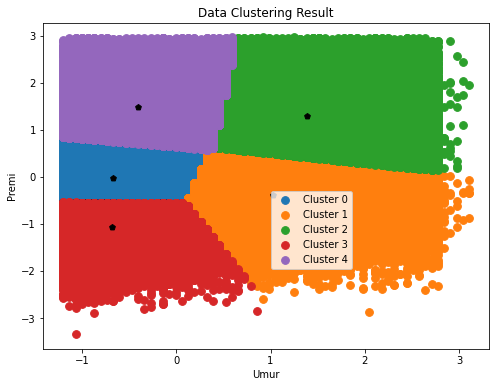

Centroid Cluster 6=
{0: array([-0.4813819 ,  1.45827522]), 1: array([ 0.35500368, -0.22817977]), 2: array([1.29257043, 1.45562792]), 3: array([-0.87652964, -0.06619335]), 4: array([-0.71513196, -1.1346557 ]), 5: array([ 1.72902735, -0.38365012])}



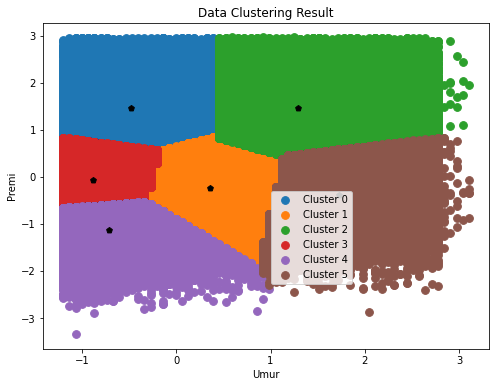

In [8]:
# inisiasi array dari hasil wcss untuk elbow method
jumlah_elbow = []
# Merubah DataFrame Menjadi Numpy Array
data = df_train.to_numpy()
#inisiasi max iterasi
max_iterasion = 100
#membuat k dengan panjang 2 sampai dengan 6
k = range(2,7)
for i in k:
    # Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
    centroid, cluster,wcss= kmeans(i, data, max_iterasion)
    print(f'Centroid Cluster {i}=\n{centroid}\n')
    #memasukan nilai wcss sebelumnya kedalam array
    jumlah_elbow.append(wcss) 
    #convert to dataframe
    df = []
    for key in cluster.keys():
        for c in cluster.get(key):
            df.append((c[0], c[1], key))
    df = pd.DataFrame(df)
    df.columns = ['Umur','Premi','Cluster']
    plt.figure(figsize=(8,6))
    plt.title('Data Clustering Result')
    for j in range(i):
        plt.scatter(
            df['Umur'][df['Cluster']==j],
            df['Premi'][df['Cluster']==j],
            cmap = 'Paired',s=60,label=f'Cluster {j}'
        )
        plt.scatter(centroid[j][0], centroid[j][1], color='k', marker='p')
    plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.5))
    plt.xlabel("Umur")
    plt.ylabel("Premi")
    plt.show()
    

## **IMPLEMENTASI ELBOW METHOD**

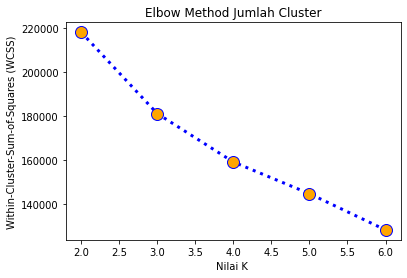

In [9]:
number_clusters = range(2,7)
plt.plot(number_clusters,jumlah_elbow, color='blue', linewidth=3,linestyle='dotted', marker='o', markersize=12, markerfacecolor='orange')
plt.title('Elbow Method Jumlah Cluster')
plt.xlabel('Nilai K ')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [10]:
for i in range(2,7):
    print(f'K = {i}, WCSS = {jumlah_elbow[i-2]}')

K = 2, WCSS = 218073.04673421528
K = 3, WCSS = 181143.04504155606
K = 4, WCSS = 159165.7501030075
K = 5, WCSS = 144768.2257599271
K = 6, WCSS = 128317.64027066813


## **IMPLEMENTASI ELBOW METHOD DENGAN MENGGUNAKAN LIBRARY KMEANS**

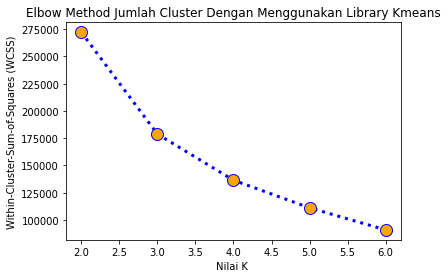

In [11]:

distance = []
K = range(2,7)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(df_train)
    distance.append(km.inertia_)

plt.plot(K, distance, color='blue', linewidth=3,linestyle='dotted', marker='o', markersize=12, markerfacecolor='orange',)
plt.title('Elbow Method Jumlah Cluster Dengan Menggunakan Library Kmeans')
plt.xlabel('Nilai K ')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [12]:
# Merubah DataFrame Menjadi Numpy Array
data = df_train.to_numpy()
#inisiasi max iterasi
max_iterasion = 100
k = 3
centroid, cluster,wcss= kmeans(k, data, max_iterasion)
print(f'Centroid Cluster {k}=\n{centroid}\n')

Centroid Cluster 3=
{0: array([0.0169984 , 1.40126866]), 1: array([-0.65384288, -0.55673929]), 2: array([ 1.23303848, -0.11381658])}



In [13]:
#convert to dataframe
df_akhir  = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_akhir .append((c[0], c[1], key))
df_akhir = pd.DataFrame(df_akhir)
df_akhir.columns = ['Umur','Premi','Cluster']
df_akhir

,Umur,Premi,Cluster
0,-0.137792,0.731161,0
1,0.193015,0.893936,0
2,1.450086,1.352549,0
3,-0.997893,0.687355,0
4,0.457662,2.142115,0
...,...,...,...
230562,0.523823,-0.965414,2
230563,2.508671,-0.352129,2
230564,1.516247,-0.440446,2
230565,1.979378,-0.472743,2


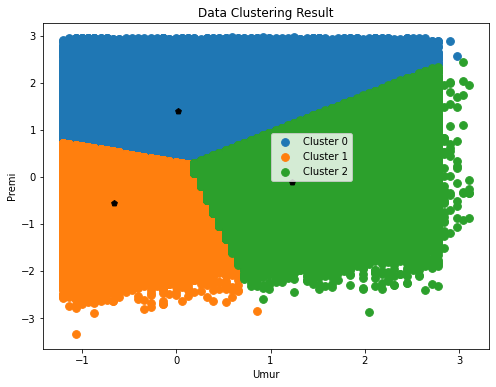

In [14]:
plt.figure(figsize=(8,6))
plt.title('Data Clustering Result')
for j in range(k):
    plt.scatter(
        df_akhir['Umur'][df_akhir['Cluster']==j],
        df_akhir['Premi'][df_akhir['Cluster']==j],
        cmap = 'Paired',s=60,label=f'Cluster {j}'
    )
    plt.scatter(centroid[j][0], centroid[j][1], color='k', marker='p')
plt.legend(loc = 'best',bbox_to_anchor=(0.5, 0.5))
plt.xlabel("Umur")
plt.ylabel("Premi")
plt.show()

In [17]:
df_akhir.to_csv('Hasil/kendaraan_train_hasil_cluster_PremiDanUmur.csv', index=False)

In [18]:
df_akhir.to_excel('Hasil/kendaraan_train_hasil_cluster_PremiDanUmur.xlsx', index=False)